Step 1: Setting Up Google Drive Integration

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the Dataset

In [ ]:
import pandas as pd

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/2-Housing Dataset.xlsx'
housing_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
housing_data.head()

,House,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking
0,1,13300000,7420,4,2,3,yes,no,no,2
1,2,12250000,8960,4,4,4,yes,no,no,3
2,3,12250000,9960,3,2,2,yes,no,yes,2
3,4,12215000,7500,4,2,2,yes,no,yes,3
4,5,11410000,7420,4,1,2,yes,yes,yes,2


Step 2: Descriptive Analysis

Descriptive Statistics for Numerical Features

In [ ]:
# Descriptive statistics for numerical features
numerical_features = housing_data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
numerical_describe = numerical_features.describe()
numerical_describe

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Visualizations for Numerical Features

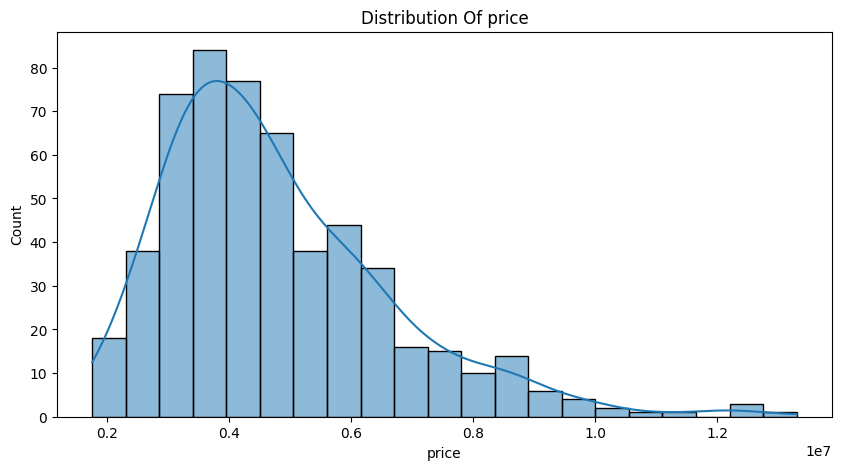

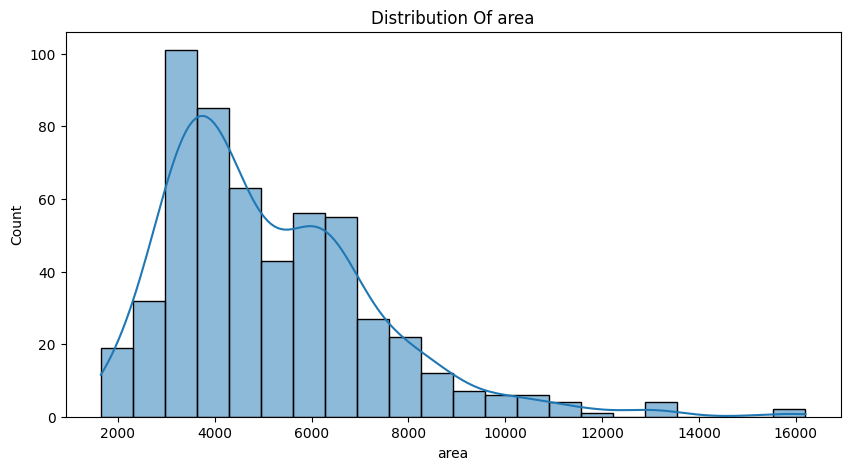

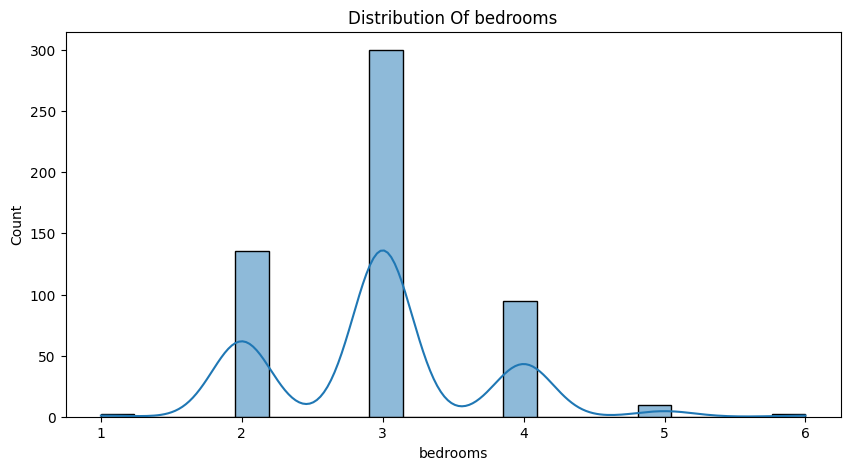

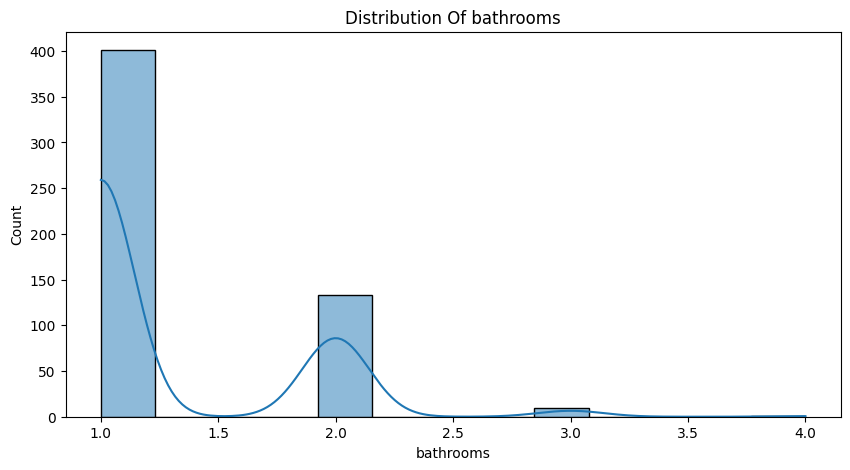

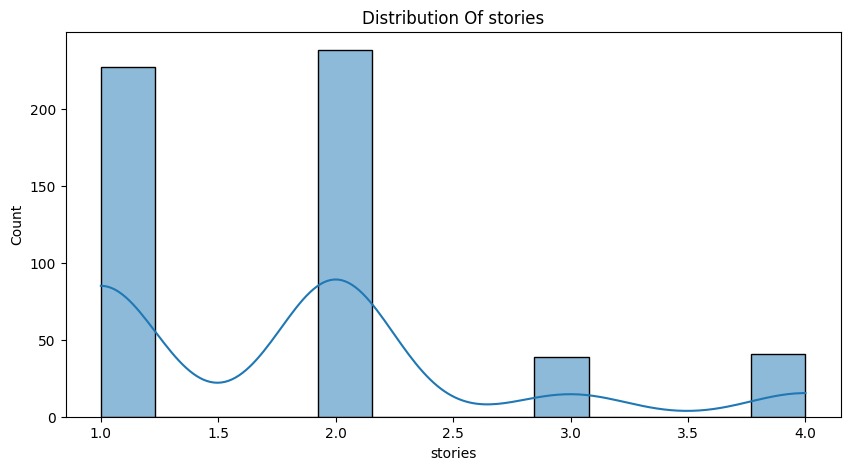

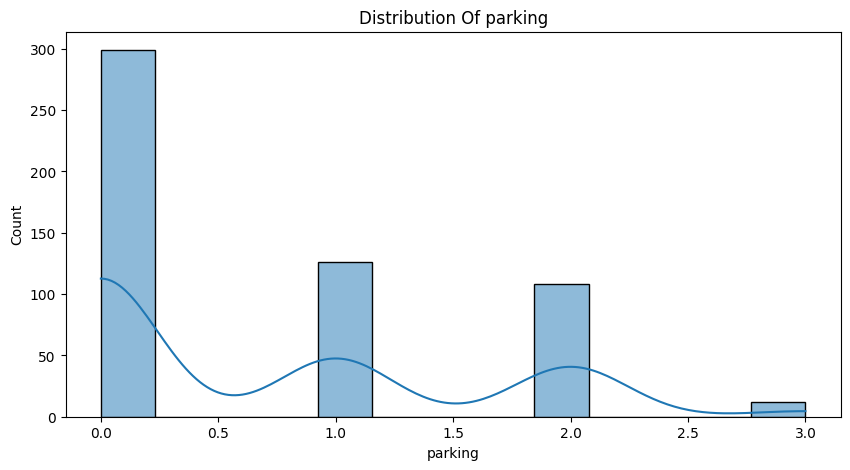

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing numerical features
for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(housing_data[column], kde=True)
    plt.title(f'Distribution Of {column}')
    plt.show()

Descriptive Statistics for Categorical Features

In [ ]:
# Descriptive statistics for categorical features
categorical_features = housing_data[['mainroad', 'guestroom', 'basement']]
categorical_describe = categorical_features.describe()
categorical_describe

,mainroad,guestroom,basement
count,545,545,545
unique,2,2,2
top,yes,no,no
freq,468,448,354


Visualizations for Categorical Features

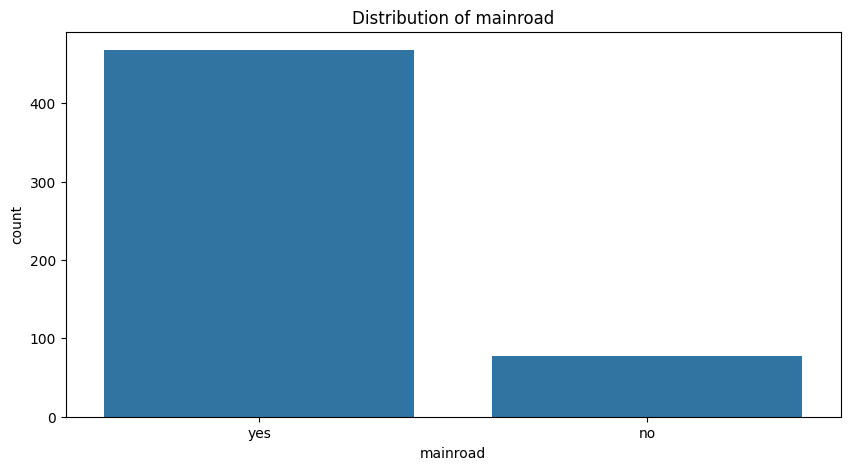

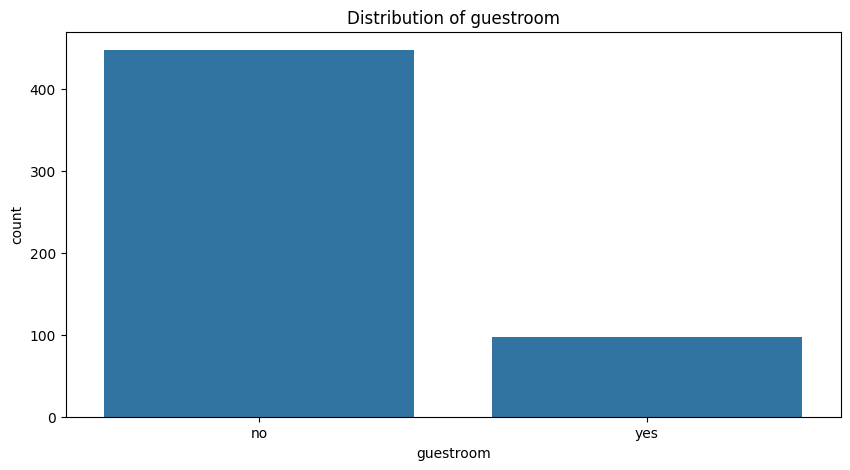

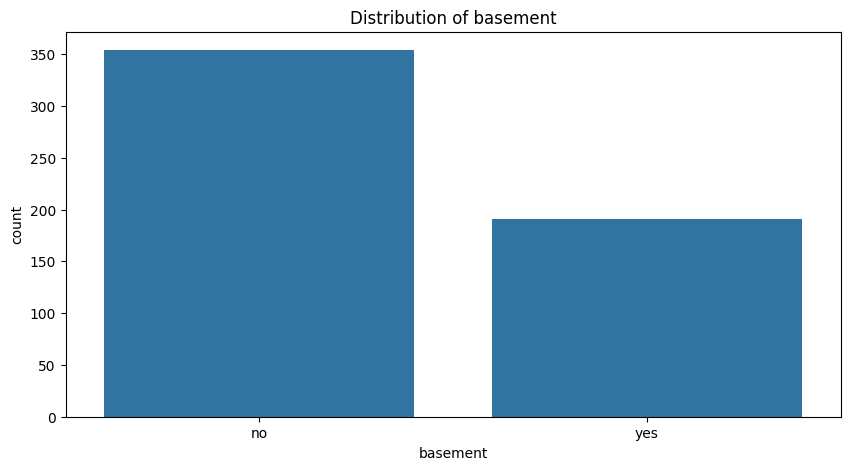

In [ ]:
# Visualizing categorical features
for column in categorical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=housing_data, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

Step 3: Correlation Analysis

Generate the correlation matrix and scatter plots

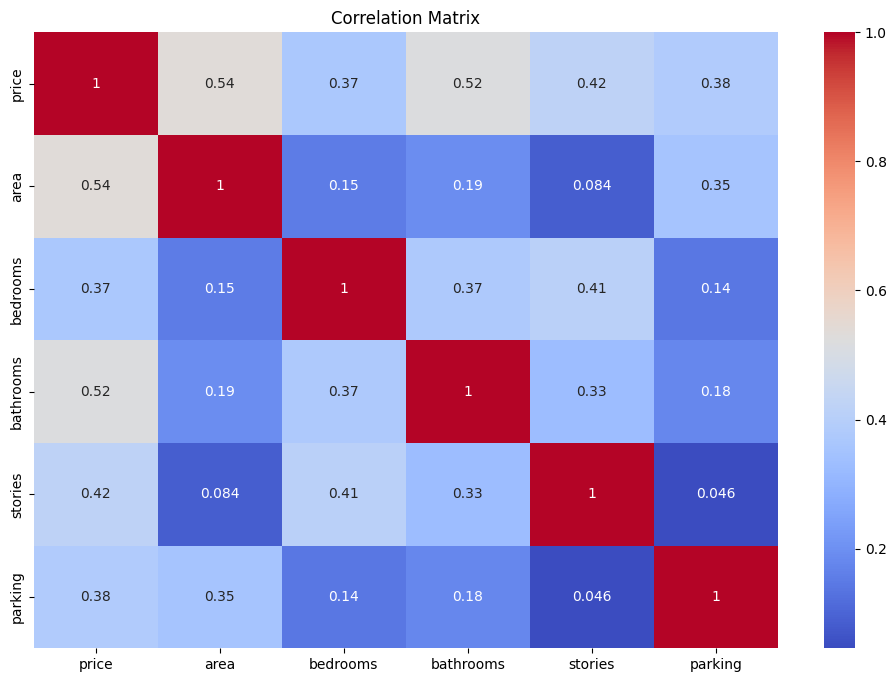

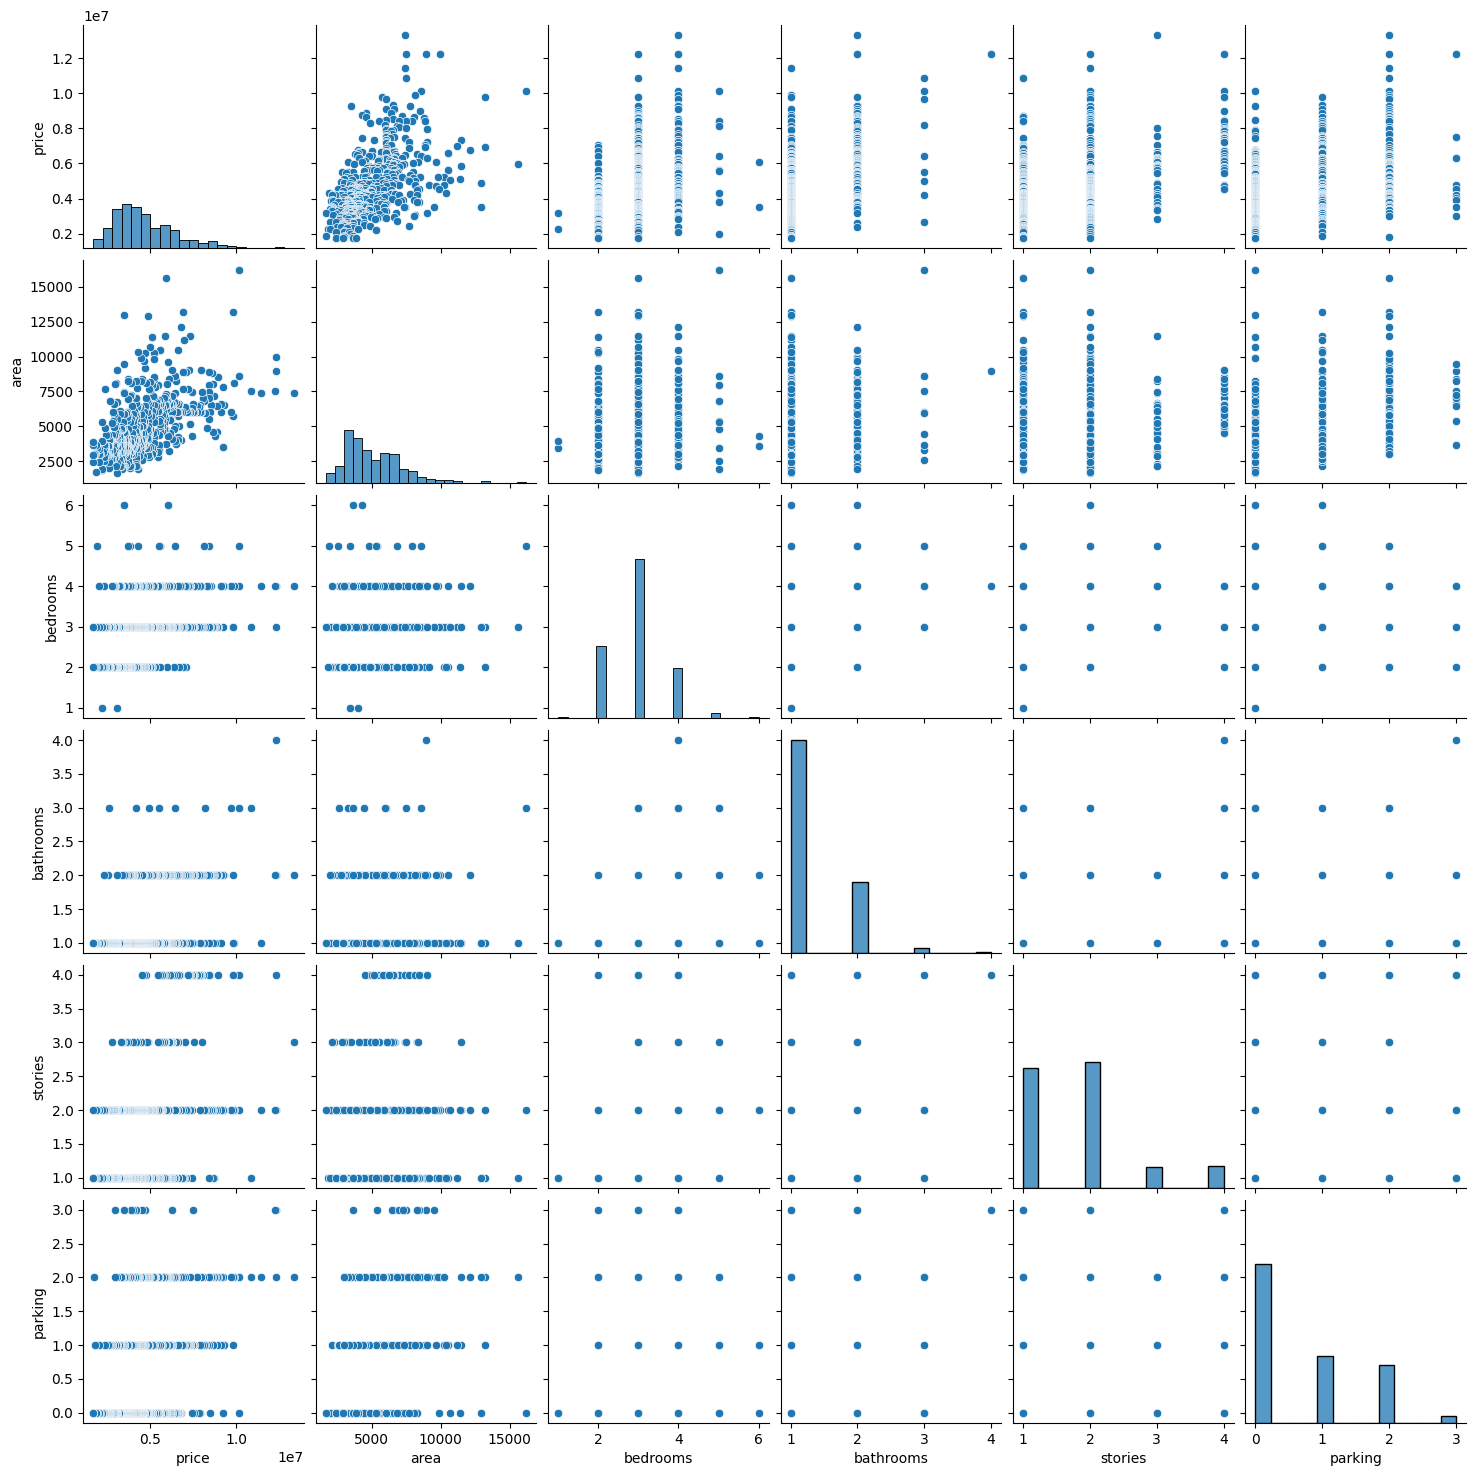

In [ ]:
# Correlation matrix
correlation_matrix = numerical_features.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for selected pairs of variables
sns.pairplot(numerical_features)
plt.show()

Step 4: PCA and Regression Analysis

Standardize the data, perform PCA, and build a regression model

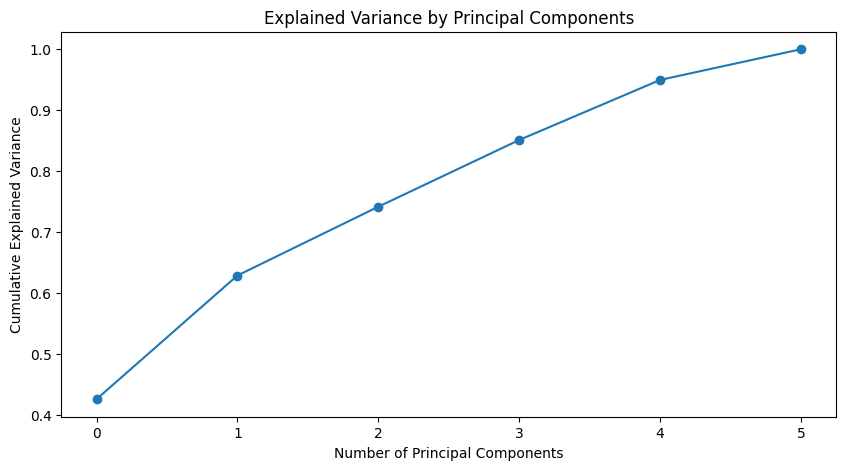

R-squared: 0.8220272333565185
RMSE: 948459.7255226314


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Selecting the first few principal components
num_components = 5  # Assuming we select the first 5 components
pca_selected = PCA(n_components=num_components)
pca_data_selected = pca_selected.fit_transform(scaled_data)

# Regression model using the principal components
X = pca_data_selected
y = housing_data['price']  # Assuming 'price' is the target variable

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predictions and model evaluation
y_pred = regression_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Results
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')